# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

### Answer

In supervised learning, we have two types of problems: classification problems and regression problems. In classification problems, we want to classify an instance as one of . In regression, we try to predict continuous values, learning from data. In this project, our task is to separate students who might need early intervention before they fail to graduate. We are going to <b><i>classify</i></b> the students in two categories: students that need early intervention, and the students who do not need any kind of intervention. Clearly, in this project we are dealing with a <b>classification problem</b>.

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [288]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
%matplotlib inline

# Read student data
student_data = pd.read_csv("student-data.csv")
print("Student data read successfully!")

Student data read successfully!


In [289]:
# Checking the dataframe
student_data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,no,5,4,2,1,2,5,10,yes
6,GP,M,16,U,LE3,T,2,2,other,other,...,yes,no,4,4,4,1,1,3,0,yes
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,no,no,4,1,4,1,1,1,6,no
8,GP,M,15,U,LE3,A,3,2,services,other,...,yes,no,4,2,2,1,1,1,0,yes
9,GP,M,15,U,GT3,T,3,4,other,other,...,yes,no,5,5,1,1,1,5,0,yes


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).

In [290]:
# TODO: Calculate number of students
n_students = student_data.shape[0]

# TODO: Calculate number of features
n_features = student_data.shape[1]

# TODO: Calculate passing students
n_passed = student_data[student_data['passed'] == 'yes'].shape[0]

# TODO: Calculate failing students
n_failed = student_data[student_data['passed'] == 'no'].shape[0]

# TODO: Calculate graduation rate
grad_rate = float(n_passed/n_students) * 100

# Print the results
print ("Total number of students: {}".format(n_students))
print ("Number of features: {}".format(n_features))
print ("Number of students who passed: {}".format(n_passed))
print ("Number of students who failed: {}".format(n_failed))
print ("Graduation rate of the class: {:.2f}%".format(grad_rate))

Total number of students: 395
Number of features: 31
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


### Going further...

Before working with the dataset, it is worth to understand the data we have. The description of this database and features can be found in this [link](https://archive.ics.uci.edu/ml/datasets/student+performance#). 

In [291]:
# List of features
print('Name of each present feature:\n\n{}'.format(list(student_data)))

Name of each present feature:

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'passed']


In [292]:
print('Type of each feature\n\n{}'.format(student_data.dtypes))

Type of each feature

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
passed        object
dtype: object


According to the list, there are 13 numerical features. After looking at the link above, the features <i>famrel, goout, Dacl, Walc</i> and <i> Health </i> are nominal features. The range of values vary from 1 - Very Low to 5 - Very High. Then, we could say these features are encoded to integer, however they are not numerical.
Only the features <i> Age </i> and <i> Absences </i> are numerical.

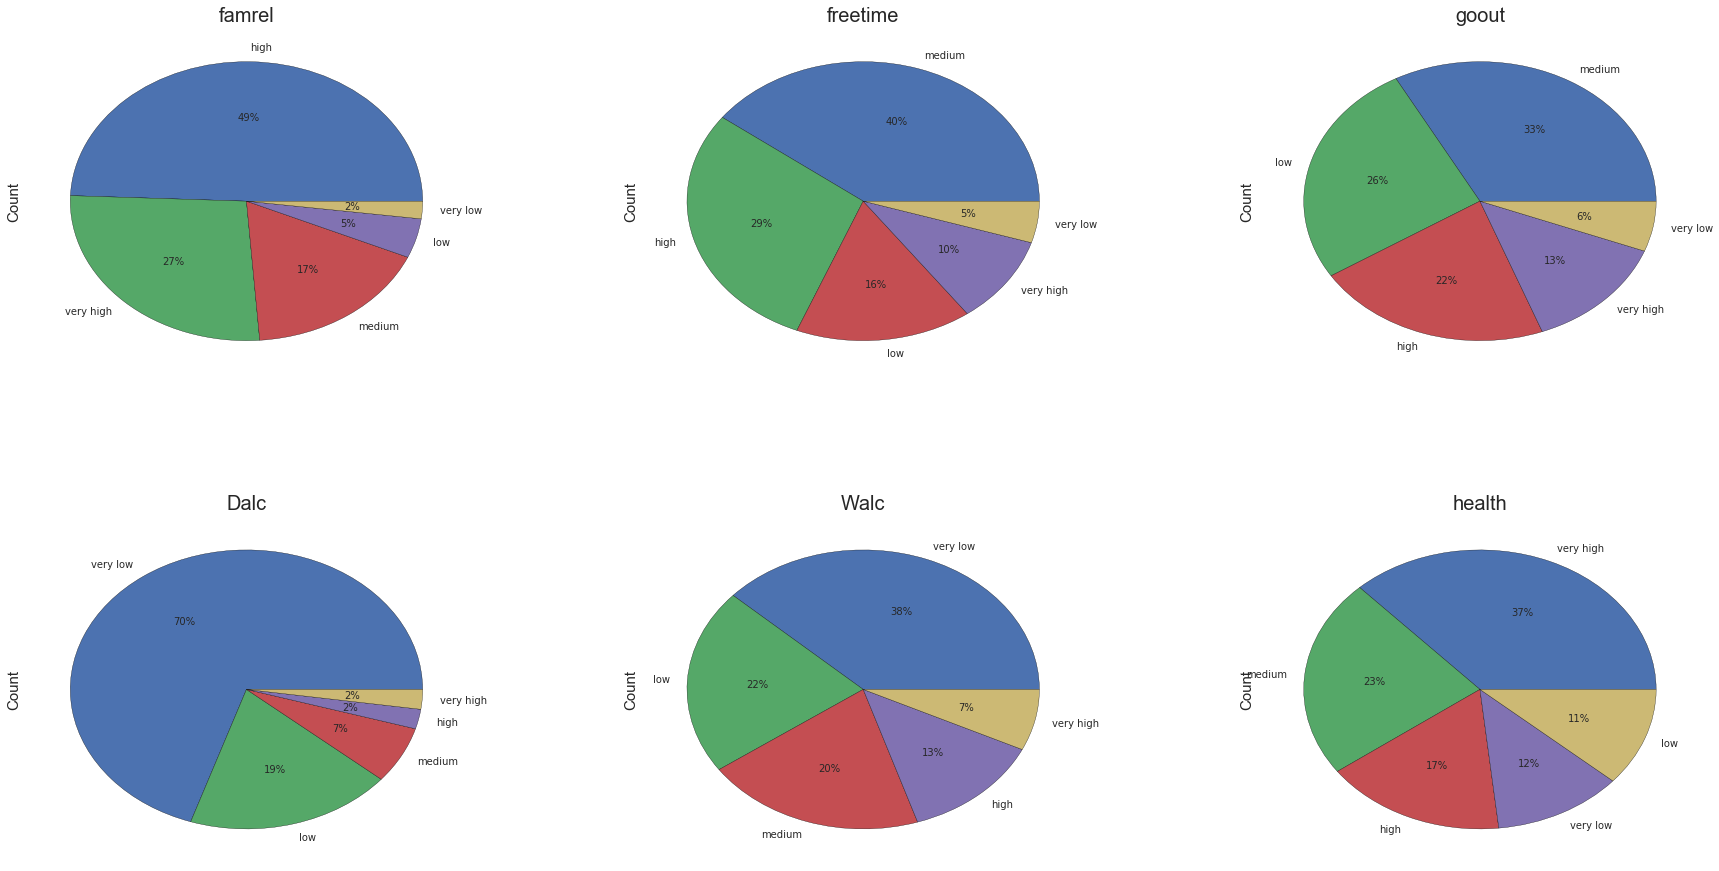

In [293]:
# Changing the values for plotting
features = ['famrel','freetime','goout','Dalc','Walc','health']
student_copy = student_data[features].replace([1,2,3,4,5],['very low','low','medium','high','very high'])

# Nice plotting with seaborn
import seaborn as sns

# Changing the size of plots
fig = plt.figure(figsize=(30,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for index, feature in enumerate(list(student_copy.columns)):
    fig.add_subplot(2, 3, index + 1)  
    ax = student_copy[feature].value_counts().plot.pie(autopct="%1.0f%%")
    plt.title(feature,fontsize=20)
    plt.xlabel('')
    plt.ylabel('Count',fontsize=15)
    
plt.show()

#### Verifying outliers

In this dataset, we have two numerical features: <i>age</i> and <i>absences</i>.

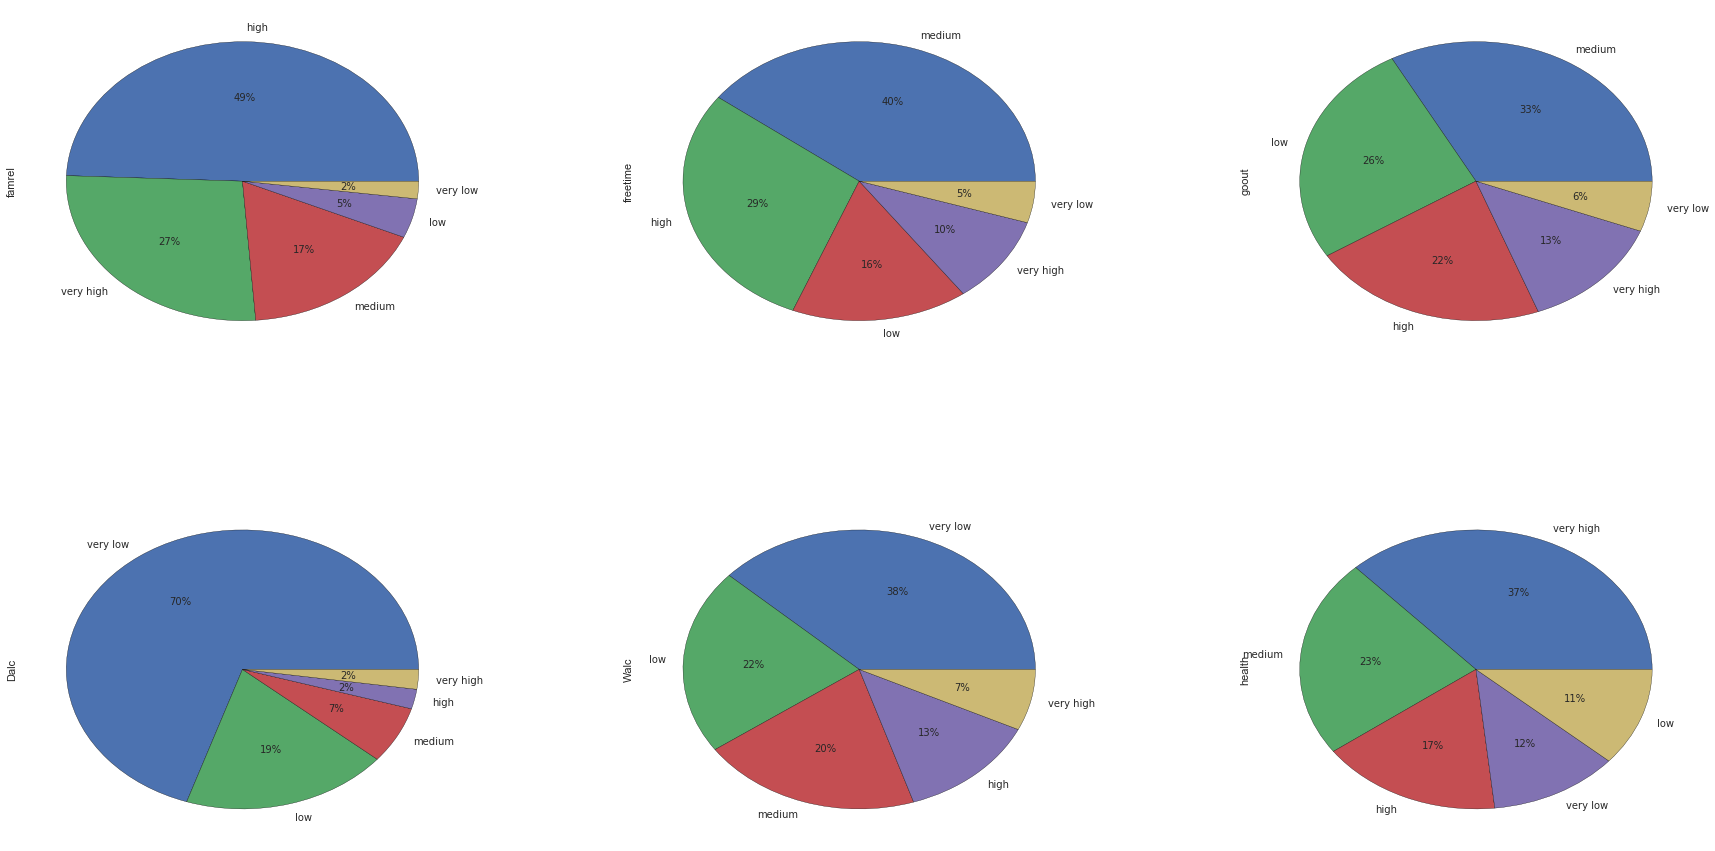

In [294]:
# Changing the size of plots
fig = plt.figure(figsize=(30,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for index, feature in enumerate(list(student_copy.columns)):
    fig.add_subplot(2, 3, index + 1)  
    ax = student_copy[feature].value_counts().plot.pie(autopct="%1.0f%%")

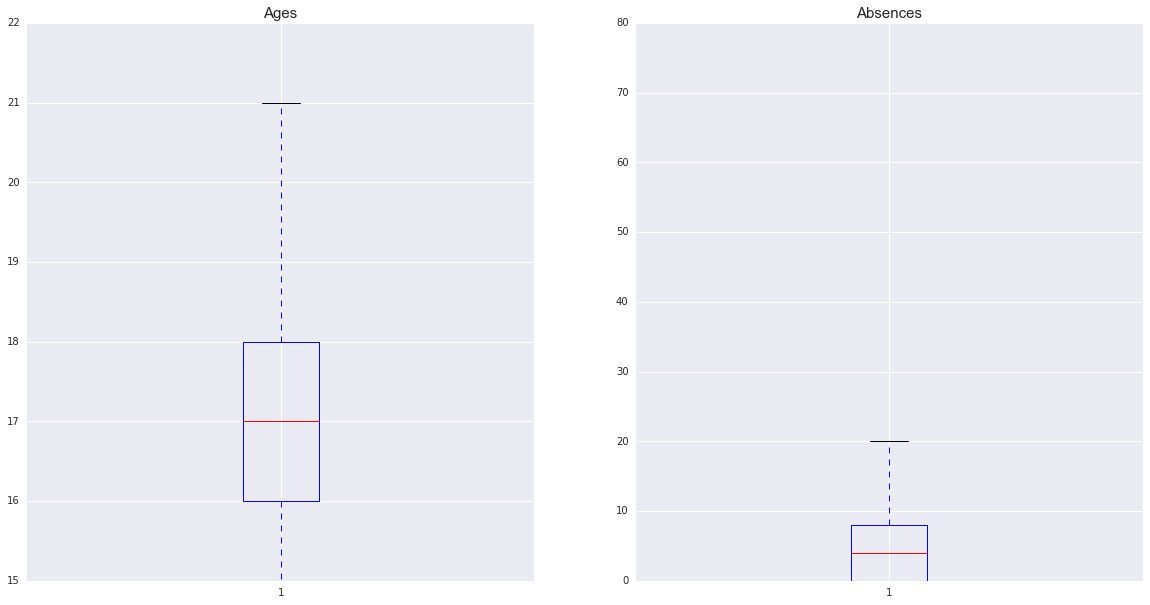

In [295]:
# Plotting boxplots
fig = plt.figure(figsize=(20,10))

fig.add_subplot(121) 
plt.boxplot(student_data['age'])
plt.title('Ages',fontsize=15)

fig.add_subplot(122) 
plt.boxplot(student_data['absences'])
plt.title('Absences',fontsize=15)

plt.show()

Well, no outliers, by tukey's method.

## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [296]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print ("Feature columns:\n{}".format(feature_cols))
print ("\nTarget column: {}".format(target_col))

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print ("Feature values:")
X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed
Feature values:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4


### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [297]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [298]:
# TODO: Import any additional functionality you may need here
from sklearn.model_selection import train_test_split

# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(X_all,y_all,test_size=0.25,random_state=0,shuffle=True)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 296 samples.
Testing set has 99 samples.


In [299]:
# Some statistics from the training set and test set
print("Training Set")
print('% Of students that may need early intervention: {:.2f}\n% Of students that may not need early interventionn: {:.2f}'.format(*y_train.value_counts()/len(y_train)))
print("\nTest Set")
print('% Of students that may need early intervention: {:.2f}\n% Of students that may not need early interventionn: {:.2f}'.format(*y_test.value_counts()/len(y_test)))

Training Set
% Of students that may need early intervention: 0.69
% Of students that may not need early interventionn: 0.31

Test Set
% Of students that may need early intervention: 0.63
% Of students that may not need early interventionn: 0.37


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

It is worth to look at image that the scikit-learn website suggests:

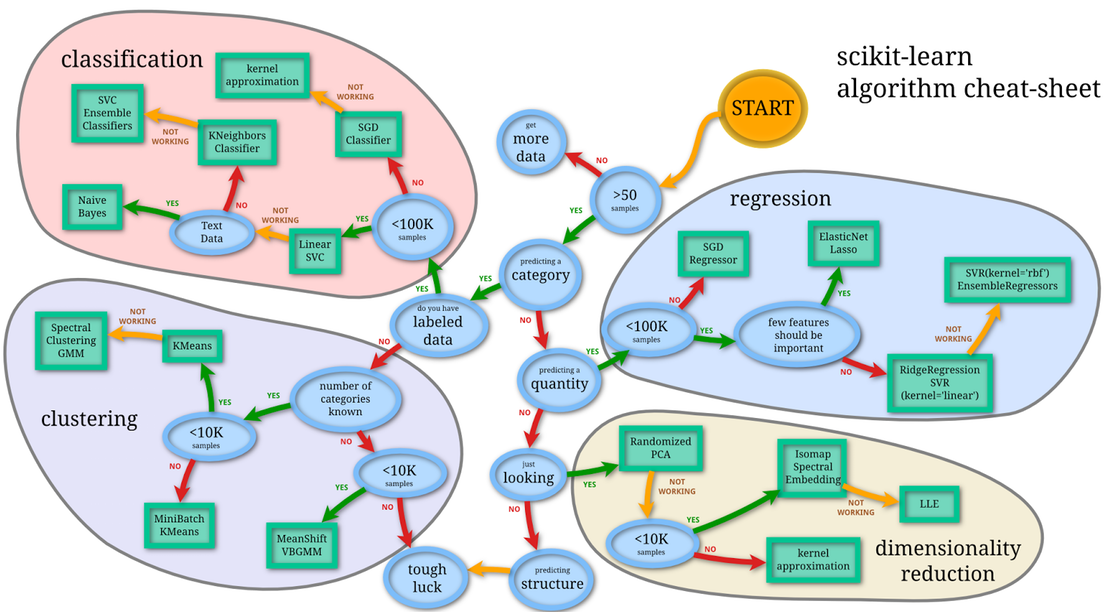

In [300]:
from IPython.display import Image as img
img('scikit-path.png')

### List three supervised learning models that are appropriate for this problem.

For learning purposes, I will describe and test each algorithm, doing the needed research for each model and veryfing their applications and scores in the dataset given.

By the image, we should investigate the results of SVC, k-NN and SVC Ensemble classifiers.

### Algorithms:

- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

#### Stochastic Gradient Descent



## k-NN

The k-NN algorithm is a kind of lazy learner algorithm, where we do not compute a function in order to classify the data. Instead, we use the data to compare with the new points we want to classify. In classification tasks, the new instances are classified based on the k-nearest points closest to the instance, based on a distance or similarity functions d. The new instance belongs to the majority class in those k points.

#### Real-world application in industry where k-NN is applied

The k-NN algorithm is applied in a lot of fields in industry. Since we classify instances by the k-nearest points, this algorithm is suitable for searching semantically similar documents, in natural language processing. Other uses of k-NN are sentiment Analysis and Concept Search.

#### Strengths of k-NN

k-NN is a simple algorithm to understand and implement.

#### Weaknesses of k-NN

Unfortunately, k-NN has a computationally expensive testing phase. Since we need to verify the k closest instances to the point we are about to classify, we have to check the dataset a lot of times, being a time consuming task. According to the history, this algorithm was neglected for years because of his need of memory to store the data points.

#### What makes k-NN a good candidate for the problem, given what you know about the data?

We do have a trade-off here: k-NN does not need to tune any parameter, but it is time consuming. It will have a worse accuracy than other powerful algorithms like SVM, however the results of k-NN can be used as a basis score. 

## Logistic Regression

#### Real-world application in industry where Logistic Regression is applied

#### Strengths of Logistic Regression

#### Weaknesses of Logistic Regression


#### What makes Logistic Regression a good candidate for the problem, given what you know about the data?



### Decision Trees

#### Real-world application in industry where Decision Trees is applied

#### Strengths of Decision Trees

The decision trees are easy to interpret, as the tree "finds" the best rules for the data given. Another Strength of decision trees is its ability to handle categorical and numerical data.

#### Weaknesses of Decision Trees

The decision Tree is prone to overfit. We should take care of the depth of the tree in order to avoid the overfit. Decision trees are also sensitive to perturbations in the data/noisy data; a small change in data can drastically change the tree. Moreover, an advantage said before could also be a weakness in decision tree model: If the tree grows, we lose our ability to interpret their decisions, leading us to lose some feeling about the solution of the problem.

#### What makes Decision Trees a good candidate for the problem, given what you know about the data?



### Gaussian Naive Bayes

#### Real-world application in industry where Gaussian Naive Bayes is applied

Gaussian Naive Bayes has a wide range of applications in industry. The main application of Naive Bayes is in text classification, widely used in Spam Filtering, Sentiment Analysis and Text Classification. 

#### Strengths of Gaussian Naive Bayes

Naive Bayes algorithm is easy to implement and easy to understand. Moreover, it is computationally fast/low complexity, since we are dealing with conditional probabilities a priori.

#### Weaknesses of Gaussian Naive Bayes

The first assumption of the Naive Bayes is the independence between features, which is not our case. Without performing a statistical test, we could infer that some features have dependence to other ones (studytime feature is highly related to the time a student waste in traveltime. More traveltime imples less study time, and other relations). This dependence decreases the performance the model can get. One more problem we can face, specially in this project, is the numerical/continuous features, where we should use a binning procedure to make those features discrete. 

#### What makes Gaussian Naive Bayes a good candidate for the problem, given what you know about the data?

Gaussian Naive Bayes would be a good candidade because we have many categorical features

### Support Vector Machines

#### Real-world application in industry where Logistic Regression is applied

#### Strengths of Logistic Regression

#### Weaknesses of Logistic Regression


#### What makes Logistic Regression a good candidate for the problem, given what you know about the data?



### Stochastic Gradient Descent

By the documentation of Scikit-Learn:

> sklearn.linear_model.SGDClassifier : Linear classifiers (SVM, logistic regression, a.o.) with SGD training.

>This estimator implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate). SGD allows minibatch (online/out-of-core) learning, see the partial_fit method. For best results using the default learning rate schedule, the data should have zero mean and unit variance.

#### Real-world application in industry where Stochastic Gradient Descent is applied

#### Strengths of Stochastic Gradient Descent

#### Weaknesses of Stochastic Gradient Descent


#### What makes Stochastic Gradient Descent a good candidate for the problem, given what you know about the data?



### Ensemble Methods

#### Real-world application in industry where Ensemble Methods is applied

One important application in industry of ensemble methods is face recognition. Using adaboost, viola and jones created the first real-time....

Although we now have deep learning beating all the older methods in image recognition, the viola-jones procedure was for a long time an important base algorithm for object recognition systems.

#### Strengths of Ensemble Methods

Ensemble methods unite the best of the classifiers

#### Weaknesses of Logistic Regression


#### What makes Ensemble methods a good candidate for the problem, given what you know about the data?

Since we have models 

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [301]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print("Made predictions in {:.4f} seconds.".format(end - start))
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print ("F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
    print ("F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test)))
    print()

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [302]:
# TODO: Import the three supervised learning models from sklearn

# Tree Classifiers
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC

# Logistic Regression
from sklearn.linear_model import LogisticRegression as LG

# k-NN Classifier
from sklearn.neighbors import KNeighborsClassifier as KNN

# SGDC
from sklearn.linear_model import SGDClassifier as SGDC

# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB as GNB

# TODO: Set up the training set sizes
X_train_100 = X_train[:100]
y_train_100 = y_train[:100]

X_train_200 = X_train[:200]
y_train_200 = y_train[:200]

X_train_300 = X_train[:300]
y_train_300 = y_train[:300]

#### k-Nearest Neighbors

In [303]:
# Initialize the models
clf_KNN = KNN()

# k-NN Classifier
train_predict(clf_KNN, X_train_100, y_train_100, X_test, y_test)
train_predict(clf_KNN, X_train_200, y_train_200, X_test, y_test)
train_predict(clf_KNN, X_train_300, y_train_300, X_test, y_test)

Training a KNeighborsClassifier using a training set size of 100. . .
Trained model in 0.0070 seconds
Made predictions in 0.0029 seconds.
F1 score for training set: 0.7857.
Made predictions in 0.0021 seconds.
F1 score for test set: 0.7429.

Training a KNeighborsClassifier using a training set size of 200. . .
Trained model in 0.0013 seconds
Made predictions in 0.0076 seconds.
F1 score for training set: 0.8622.
Made predictions in 0.0051 seconds.
F1 score for test set: 0.6957.

Training a KNeighborsClassifier using a training set size of 296. . .
Trained model in 0.0011 seconds
Made predictions in 0.0056 seconds.
F1 score for training set: 0.8719.
Made predictions in 0.0025 seconds.
F1 score for test set: 0.7448.



#### Tree-Based Classifiers

In [304]:
# Initialize the models
clf_DT = DTC(random_state=0)
clf_RF = RFC(random_state=0)

In [305]:
# Decision Tree Classifier
train_predict(clf_DT, X_train_100, y_train_100, X_test, y_test)
train_predict(clf_DT, X_train_200, y_train_200, X_test, y_test)
train_predict(clf_DT, X_train_300, y_train_300, X_test, y_test)

Training a DecisionTreeClassifier using a training set size of 100. . .
Trained model in 0.0173 seconds
Made predictions in 0.0011 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0005 seconds.
F1 score for test set: 0.7000.

Training a DecisionTreeClassifier using a training set size of 200. . .
Trained model in 0.0020 seconds
Made predictions in 0.0008 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0020 seconds.
F1 score for test set: 0.6917.

Training a DecisionTreeClassifier using a training set size of 296. . .
Trained model in 0.0079 seconds
Made predictions in 0.0008 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0005 seconds.
F1 score for test set: 0.7500.



In [306]:
# Random Forest Classifier
train_predict(clf_RF, X_train_100, y_train_100, X_test, y_test)
train_predict(clf_RF, X_train_200, y_train_200, X_test, y_test)
train_predict(clf_RF, X_train_300, y_train_300, X_test, y_test)

Training a RandomForestClassifier using a training set size of 100. . .
Trained model in 0.0422 seconds
Made predictions in 0.0022 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0013 seconds.
F1 score for test set: 0.7536.

Training a RandomForestClassifier using a training set size of 200. . .
Trained model in 0.0218 seconds
Made predictions in 0.0020 seconds.
F1 score for training set: 0.9846.
Made predictions in 0.0035 seconds.
F1 score for test set: 0.7500.

Training a RandomForestClassifier using a training set size of 296. . .
Trained model in 0.0303 seconds
Made predictions in 0.0017 seconds.
F1 score for training set: 0.9828.
Made predictions in 0.0015 seconds.
F1 score for test set: 0.7917.



#### Logistic Regression

In [307]:
# Initialize the model
clf_LG = LG(random_state=0)

In [308]:
# Logistic Regression Classifier
train_predict(clf_LG, X_train_100, y_train_100, X_test, y_test)
train_predict(clf_LG, X_train_200, y_train_200, X_test, y_test)
train_predict(clf_LG, X_train_300, y_train_300, X_test, y_test)

Training a LogisticRegression using a training set size of 100. . .
Trained model in 0.0166 seconds
Made predictions in 0.0007 seconds.
F1 score for training set: 0.8000.
Made predictions in 0.0005 seconds.
F1 score for test set: 0.7153.

Training a LogisticRegression using a training set size of 200. . .
Trained model in 0.0026 seconds
Made predictions in 0.0013 seconds.
F1 score for training set: 0.8269.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.7770.

Training a LogisticRegression using a training set size of 296. . .
Trained model in 0.0089 seconds
Made predictions in 0.0006 seconds.
F1 score for training set: 0.8474.
Made predictions in 0.0003 seconds.
F1 score for test set: 0.7801.



#### Stochastic Gradient Descent

In [309]:
# Initialize the model
clf_SGD = SGDC(random_state=0)

/Users/Michel/anaconda/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [310]:
# Logistic Regression Classifier
train_predict(clf_SGD, X_train_100, y_train_100, X_test, y_test)
train_predict(clf_SGD, X_train_200, y_train_200, X_test, y_test)
train_predict(clf_SGD, X_train_300, y_train_300, X_test, y_test)

Training a SGDClassifier using a training set size of 100. . .
Trained model in 0.0147 seconds
Made predictions in 0.0003 seconds.
F1 score for training set: 0.6022.
Made predictions in 0.0005 seconds.
F1 score for test set: 0.5636.

Training a SGDClassifier using a training set size of 200. . .
Trained model in 0.0015 seconds
Made predictions in 0.0005 seconds.
F1 score for training set: 0.7952.
Made predictions in 0.0005 seconds.
F1 score for test set: 0.7702.

Training a SGDClassifier using a training set size of 296. . .
Trained model in 0.0019 seconds
Made predictions in 0.0006 seconds.
F1 score for training set: 0.4552.
Made predictions in 0.0005 seconds.
F1 score for test set: 0.4368.



#### Naive Bayes

In [311]:
# Initialize the model
clf_GNB = GNB()

In [312]:
# Gaussian Naive Bayes Classifier
train_predict(clf_GNB, X_train_100, y_train_100, X_test, y_test)
train_predict(clf_GNB, X_train_200, y_train_200, X_test, y_test)
train_predict(clf_GNB, X_train_300, y_train_300, X_test, y_test)

Training a GaussianNB using a training set size of 100. . .
Trained model in 0.0023 seconds
Made predictions in 0.0008 seconds.
F1 score for training set: 0.8217.
Made predictions in 0.0007 seconds.
F1 score for test set: 0.7299.

Training a GaussianNB using a training set size of 200. . .
Trained model in 0.0027 seconds
Made predictions in 0.0021 seconds.
F1 score for training set: 0.8315.
Made predictions in 0.0011 seconds.
F1 score for test set: 0.7111.

Training a GaussianNB using a training set size of 296. . .
Trained model in 0.0017 seconds
Made predictions in 0.0025 seconds.
F1 score for training set: 0.8120.
Made predictions in 0.0009 seconds.
F1 score for test set: 0.7465.



#### Support Vector Machines

In [313]:
# Initialize the model
clf_GNB = GNB()

In [314]:
# Gaussian Naive Bayes Classifier
train_predict(clf_GNB, X_train_100, y_train_100, X_test, y_test)
train_predict(clf_GNB, X_train_200, y_train_200, X_test, y_test)
train_predict(clf_GNB, X_train_300, y_train_300, X_test, y_test)

Training a GaussianNB using a training set size of 100. . .
Trained model in 0.0036 seconds
Made predictions in 0.0009 seconds.
F1 score for training set: 0.8217.
Made predictions in 0.0006 seconds.
F1 score for test set: 0.7299.

Training a GaussianNB using a training set size of 200. . .
Trained model in 0.0012 seconds
Made predictions in 0.0006 seconds.
F1 score for training set: 0.8315.
Made predictions in 0.0006 seconds.
F1 score for test set: 0.7111.

Training a GaussianNB using a training set size of 296. . .
Trained model in 0.0011 seconds
Made predictions in 0.0007 seconds.
F1 score for training set: 0.8120.
Made predictions in 0.0006 seconds.
F1 score for test set: 0.7465.



#### Ensemble Methods

In [315]:
# Initialize the model
clf_GNB = GNB()

In [316]:
# Gaussian Naive Bayes Classifier
train_predict(clf_GNB, X_train_100, y_train_100, X_test, y_test)
train_predict(clf_GNB, X_train_200, y_train_200, X_test, y_test)
train_predict(clf_GNB, X_train_300, y_train_300, X_test, y_test)

Training a GaussianNB using a training set size of 100. . .
Trained model in 0.0027 seconds
Made predictions in 0.0013 seconds.
F1 score for training set: 0.8217.
Made predictions in 0.0007 seconds.
F1 score for test set: 0.7299.

Training a GaussianNB using a training set size of 200. . .
Trained model in 0.0015 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.8315.
Made predictions in 0.0008 seconds.
F1 score for test set: 0.7111.

Training a GaussianNB using a training set size of 296. . .
Trained model in 0.0023 seconds
Made predictions in 0.0012 seconds.
F1 score for training set: 0.8120.
Made predictions in 0.0009 seconds.
F1 score for test set: 0.7465.



### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - k-NN**  

| Training Set Size |     Training Time       | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |     0.0268 seconds      |    0.0018 seconds      |      0.7857      |      0.7429     |
| 200               |     0.0034 seconds      |    0.0022 seconds      |      0.8622      |      0.6957     |
| 300               |     0.0013 seconds      |    0.0026 seconds      |      0.8719      |      0.7448     |

** Classifer 2 - Decision Tree Classifier**  

| Training Set Size | Training Time           | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |    0.0043 seconds       |  0.0005 seconds        |    1.0000        |        0.7000   |
| 200               |    0.0028 seconds       |  0.0006 seconds        |    1.0000        |        0.6917   |
| 300               |    0.0028 seconds       |  0.0007 seconds        |    1.0000        |        0.7500   |


The results indicates the model is overfitted, since we have a perfect score on training phase, and a poor score on test phase. The depth of the tree should be reduced!

** Classifer 3 - Random Forest Classifier**  

| Training Set Size | Training Time           | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |         0.0209 seconds  |       0.0017 seconds   |         1.0000   |      0.7536     |
| 200               |         0.0217 seconds  |       0.0024 seconds   |         0.9846   |      0.7500     |
| 300               |         0.0280 seconds  |       0.0020 seconds   |         0.9828   |      0.7917     |

Again, the model is probably overfitted.

** Classifer 4 - Logistic Regression**  

| Training Set Size | Training Time           | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |        0.0028 seconds   |    0.0005 seconds      |   0.8000         |    0.7153       |
| 200               |        0.0024 seconds   |    0.0006 seconds      |   0.8269         |    0.7770       |
| 300               |        0.0057 seconds   |    0.0004 seconds      |   0.8474         |    0.7801       |

** Classifer 5 - Stochastic Gradient Descent **  

| Training Set Size | Training Time           | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |   0.0159 seconds        |      0.0010 seconds    |   0.7750         |     0.7771      |
| 200               |   0.0064 seconds        |      0.0005 seconds    |   0.8000         |     0.7848      |
| 300               |   0.0020 seconds        |      0.0005 seconds    |   0.8370         |     0.7891      |

** Classifer 6 - Gaussian Naive Bayes**  

| Training Set Size | Training Time           | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |       0.0021 seconds    |    0.0011 seconds      |       0.8217     |    0.7299       |
| 200               |       0.0012 seconds    |    0.0005 seconds      |       0.8315     |    0.7111       |
| 300               |       0.0058 seconds    |    0.0010 seconds      |       0.8120     |    0.7465       |

** Classifer 7 - SVM **  

| Training Set Size | Training Time           | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |                         |                        |                  |                 |
| 200               |                         |                        |                  |                 |
| 300               |                         |                        |                  |                 |

** Classifer 8 - Ensemble Methods **  

| Training Set Size | Training Time           | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |                         |                        |                  |                 |
| 200               |                         |                        |                  |                 |
| 300               |                         |                        |                  |                 |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

#### Answer: 

Before choosing the best model by the results before, it is useful to verify their mean performance instead of just running a classifier one time.

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

#### Answer:

The machine learning model chosen was ... . In our problem, we....

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [318]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.

# TODO: Create the parameters list you wish to tune
parameters = None

# TODO: Initialize the classifier
clf = None

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = None

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = None

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = None

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print ("Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train, y_train)))
print ("Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test, y_test)))

SyntaxError: invalid syntax (<ipython-input-318-87f0e54eeb44>, line 2)

### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

### Answer:

The final model

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.